# Import 

## Library

In [57]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import tensorflow as tf #Libreria de Redes Neronales
from  tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
pd.set_option('display.float_format', lambda x: '%.1d' % x) 
import seaborn as sns

2.9.1


## DataSet

In [58]:
iris = load_iris()
X = iris.data[:,0:2]
Y = iris.target

In [59]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

# Preprocessing

## Split 

In [60]:
# Separamos train y test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Scaler

In [61]:
# Noralizamos
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [62]:
X_test_scal.shape

(30, 2)

# Artificial Neural Network

## Hyperparameter

In [63]:
# Function of Activation
fun = 'sigmoid'

# Learning Rate
lr = 0.1

#  Optimizador
opt = SGD(learning_rate=lr)

#  Funcion de Penalizaciona
loss_func = SparseCategoricalCrossentropy()

# Batch Size , samples enter the neural network from to baches
bs = 8

# Training epochs, number of iterations
epochs_training = 1000

# Number of  Hidden layer



## Definition of  Architecture

Dense ( __layer fully-connected__ )

Dense( number __OUTPUT__ , number __INPUT__ , __Activation Function__ )

Dense( number __OUTPUT__ ,  __Activation Function__ )


In [64]:
# To remove models that have been saved in memory
tf.keras.backend.clear_session() 

model = tf.keras.models.Sequential([
    #First layer of the network
    tf.keras.layers.Dense(4,input_dim=2, activation=fun),
    # Hidden Layers
    tf.keras.layers.Dense(4, activation=fun), 
    tf.keras.layers.Dense(4, activation=fun),
    tf.keras.layers.Dense(4, activation=fun),
    # Output of the network
    tf.keras.layers.Dense(3, activation='softmax')
])

### Information

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 3)                 15        
                                                                 
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


## Compile

In [66]:
model.compile(optimizer = opt , loss = loss_func , metrics = ['accuracy'])

# TRAINING

In [67]:
training = model.fit(X_train_scal,y_train,epochs=epochs_training,validation_split=0.2)

Epoch 1/1000
3/3 [==============================] - 1s 118ms/step - loss: 1.1339 - accuracy: 0.2708 - val_loss: 1.0838 - val_accuracy: 0.4583
Epoch 2/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.1164 - accuracy: 0.2708 - val_loss: 1.0907 - val_accuracy: 0.4583
Epoch 3/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.1034 - accuracy: 0.3854 - val_loss: 1.0987 - val_accuracy: 0.2500
Epoch 4/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.0972 - accuracy: 0.3854 - val_loss: 1.1064 - val_accuracy: 0.2500
Epoch 5/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.0925 - accuracy: 0.4375 - val_loss: 1.1132 - val_accuracy: 0.2917
Epoch 6/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.0900 - accuracy: 0.4688 - val_loss: 1.1184 - val_accuracy: 0.2917
Epoch 7/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.0915 - accuracy: 0.3854 - val_loss: 1.1225 - val_accuracy: 0.2917
Epoch 8/1000

Epoch 59/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.0869 - accuracy: 0.3854 - val_loss: 1.1419 - val_accuracy: 0.2917
Epoch 60/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.0860 - accuracy: 0.3854 - val_loss: 1.1422 - val_accuracy: 0.2917
Epoch 61/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.0882 - accuracy: 0.3854 - val_loss: 1.1425 - val_accuracy: 0.2917
Epoch 62/1000
3/3 [==============================] - 0s 13ms/step - loss: 1.0879 - accuracy: 0.3854 - val_loss: 1.1414 - val_accuracy: 0.2917
Epoch 63/1000
3/3 [==============================] - 0s 13ms/step - loss: 1.0882 - accuracy: 0.3854 - val_loss: 1.1410 - val_accuracy: 0.2917
Epoch 64/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.0921 - accuracy: 0.3854 - val_loss: 1.1414 - val_accuracy: 0.2917
Epoch 65/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.0862 - accuracy: 0.3854 - val_loss: 1.1413 - val_accuracy: 0.2917
Epoch 

3/3 [==============================] - 0s 14ms/step - loss: 1.0852 - accuracy: 0.3854 - val_loss: 1.1416 - val_accuracy: 0.2917
Epoch 117/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.0846 - accuracy: 0.3854 - val_loss: 1.1415 - val_accuracy: 0.2917
Epoch 118/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.0856 - accuracy: 0.3854 - val_loss: 1.1411 - val_accuracy: 0.2917
Epoch 119/1000
3/3 [==============================] - 0s 13ms/step - loss: 1.0862 - accuracy: 0.3854 - val_loss: 1.1411 - val_accuracy: 0.2917
Epoch 120/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.0840 - accuracy: 0.3854 - val_loss: 1.1412 - val_accuracy: 0.2917
Epoch 121/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.0857 - accuracy: 0.3854 - val_loss: 1.1416 - val_accuracy: 0.2917
Epoch 122/1000
3/3 [==============================] - 0s 13ms/step - loss: 1.0886 - accuracy: 0.3854 - val_loss: 1.1418 - val_accuracy: 0.2917
Epoch 123/1000

3/3 [==============================] - 0s 14ms/step - loss: 1.0829 - accuracy: 0.3854 - val_loss: 1.1392 - val_accuracy: 0.2917
Epoch 174/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.0840 - accuracy: 0.3854 - val_loss: 1.1388 - val_accuracy: 0.2917
Epoch 175/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.0841 - accuracy: 0.3854 - val_loss: 1.1399 - val_accuracy: 0.2917
Epoch 176/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.0868 - accuracy: 0.3854 - val_loss: 1.1400 - val_accuracy: 0.2917
Epoch 177/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.0828 - accuracy: 0.3854 - val_loss: 1.1394 - val_accuracy: 0.2917
Epoch 178/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.0832 - accuracy: 0.3854 - val_loss: 1.1390 - val_accuracy: 0.2917
Epoch 179/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.0835 - accuracy: 0.3854 - val_loss: 1.1392 - val_accuracy: 0.2917
Epoch 180/1000

3/3 [==============================] - 0s 16ms/step - loss: 1.0833 - accuracy: 0.3958 - val_loss: 1.1381 - val_accuracy: 0.2917
Epoch 231/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.0810 - accuracy: 0.3854 - val_loss: 1.1376 - val_accuracy: 0.2917
Epoch 232/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.0806 - accuracy: 0.3854 - val_loss: 1.1377 - val_accuracy: 0.2917
Epoch 233/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.0821 - accuracy: 0.3854 - val_loss: 1.1386 - val_accuracy: 0.2917
Epoch 234/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.0809 - accuracy: 0.3854 - val_loss: 1.1377 - val_accuracy: 0.2917
Epoch 235/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.0813 - accuracy: 0.3854 - val_loss: 1.1380 - val_accuracy: 0.2917
Epoch 236/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.0815 - accuracy: 0.3854 - val_loss: 1.1371 - val_accuracy: 0.2917
Epoch 237/1000

3/3 [==============================] - 0s 18ms/step - loss: 1.0765 - accuracy: 0.3854 - val_loss: 1.1337 - val_accuracy: 0.2917
Epoch 288/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.0781 - accuracy: 0.3854 - val_loss: 1.1327 - val_accuracy: 0.2917
Epoch 289/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.0761 - accuracy: 0.3854 - val_loss: 1.1329 - val_accuracy: 0.2917
Epoch 290/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.0747 - accuracy: 0.3854 - val_loss: 1.1333 - val_accuracy: 0.2917
Epoch 291/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.0786 - accuracy: 0.4896 - val_loss: 1.1328 - val_accuracy: 0.2917
Epoch 292/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.0749 - accuracy: 0.3854 - val_loss: 1.1335 - val_accuracy: 0.2917
Epoch 293/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.0746 - accuracy: 0.3854 - val_loss: 1.1333 - val_accuracy: 0.2917
Epoch 294/1000

3/3 [==============================] - 0s 15ms/step - loss: 1.0645 - accuracy: 0.3854 - val_loss: 1.1266 - val_accuracy: 0.2917
Epoch 345/1000
3/3 [==============================] - 0s 23ms/step - loss: 1.0661 - accuracy: 0.4271 - val_loss: 1.1276 - val_accuracy: 0.2917
Epoch 346/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.0642 - accuracy: 0.3854 - val_loss: 1.1279 - val_accuracy: 0.2917
Epoch 347/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.0652 - accuracy: 0.3854 - val_loss: 1.1272 - val_accuracy: 0.2917
Epoch 348/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.0638 - accuracy: 0.3958 - val_loss: 1.1272 - val_accuracy: 0.2917
Epoch 349/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.0632 - accuracy: 0.3958 - val_loss: 1.1270 - val_accuracy: 0.2917
Epoch 350/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.0629 - accuracy: 0.3854 - val_loss: 1.1269 - val_accuracy: 0.2917
Epoch 351/1000

3/3 [==============================] - 0s 20ms/step - loss: 1.0372 - accuracy: 0.7188 - val_loss: 1.1085 - val_accuracy: 0.5417
Epoch 402/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.0371 - accuracy: 0.6250 - val_loss: 1.1077 - val_accuracy: 0.5417
Epoch 403/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.0383 - accuracy: 0.5833 - val_loss: 1.1069 - val_accuracy: 0.5417
Epoch 404/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.0362 - accuracy: 0.7292 - val_loss: 1.1062 - val_accuracy: 0.5417
Epoch 405/1000
3/3 [==============================] - 0s 20ms/step - loss: 1.0343 - accuracy: 0.6979 - val_loss: 1.1059 - val_accuracy: 0.5417
Epoch 406/1000
3/3 [==============================] - 0s 26ms/step - loss: 1.0342 - accuracy: 0.7083 - val_loss: 1.1062 - val_accuracy: 0.5417
Epoch 407/1000
3/3 [==============================] - 0s 27ms/step - loss: 1.0331 - accuracy: 0.7083 - val_loss: 1.1062 - val_accuracy: 0.5417
Epoch 408/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.9446 - accuracy: 0.7188 - val_loss: 1.0385 - val_accuracy: 0.5417
Epoch 459/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.9395 - accuracy: 0.7188 - val_loss: 1.0364 - val_accuracy: 0.5417
Epoch 460/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.9373 - accuracy: 0.7188 - val_loss: 1.0341 - val_accuracy: 0.5417
Epoch 461/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.9331 - accuracy: 0.7188 - val_loss: 1.0321 - val_accuracy: 0.5417
Epoch 462/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.9293 - accuracy: 0.7188 - val_loss: 1.0302 - val_accuracy: 0.5417
Epoch 463/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.9256 - accuracy: 0.7188 - val_loss: 1.0277 - val_accuracy: 0.5417
Epoch 464/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.9224 - accuracy: 0.7188 - val_loss: 1.0252 - val_accuracy: 0.5417
Epoch 465/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.6984 - accuracy: 0.7188 - val_loss: 0.8389 - val_accuracy: 0.5417
Epoch 516/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.6920 - accuracy: 0.7188 - val_loss: 0.8352 - val_accuracy: 0.5417
Epoch 517/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6893 - accuracy: 0.7188 - val_loss: 0.8311 - val_accuracy: 0.5417
Epoch 518/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.6862 - accuracy: 0.7188 - val_loss: 0.8283 - val_accuracy: 0.5417
Epoch 519/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6795 - accuracy: 0.7188 - val_loss: 0.8239 - val_accuracy: 0.5417
Epoch 520/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6767 - accuracy: 0.7188 - val_loss: 0.8194 - val_accuracy: 0.5417
Epoch 521/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6720 - accuracy: 0.7188 - val_loss: 0.8158 - val_accuracy: 0.5417
Epoch 522/1000

3/3 [==============================] - 0s 21ms/step - loss: 0.5384 - accuracy: 0.7812 - val_loss: 0.6791 - val_accuracy: 0.6250
Epoch 573/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.5365 - accuracy: 0.7604 - val_loss: 0.6768 - val_accuracy: 0.6250
Epoch 574/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.5358 - accuracy: 0.7812 - val_loss: 0.6753 - val_accuracy: 0.6250
Epoch 575/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.5345 - accuracy: 0.7708 - val_loss: 0.6744 - val_accuracy: 0.6250
Epoch 576/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.5320 - accuracy: 0.7812 - val_loss: 0.6735 - val_accuracy: 0.6250
Epoch 577/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.5303 - accuracy: 0.7708 - val_loss: 0.6715 - val_accuracy: 0.6250
Epoch 578/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.5313 - accuracy: 0.7812 - val_loss: 0.6713 - val_accuracy: 0.6250
Epoch 579/1000

3/3 [==============================] - 0s 36ms/step - loss: 0.4824 - accuracy: 0.7812 - val_loss: 0.6158 - val_accuracy: 0.6250
Epoch 630/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4824 - accuracy: 0.7812 - val_loss: 0.6143 - val_accuracy: 0.6250
Epoch 631/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.4819 - accuracy: 0.7812 - val_loss: 0.6134 - val_accuracy: 0.6250
Epoch 632/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.4814 - accuracy: 0.7812 - val_loss: 0.6139 - val_accuracy: 0.6250
Epoch 633/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4801 - accuracy: 0.7812 - val_loss: 0.6139 - val_accuracy: 0.6250
Epoch 634/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.4794 - accuracy: 0.7812 - val_loss: 0.6136 - val_accuracy: 0.6250
Epoch 635/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.4794 - accuracy: 0.7812 - val_loss: 0.6133 - val_accuracy: 0.6250
Epoch 636/1000

3/3 [==============================] - 0s 22ms/step - loss: 0.4585 - accuracy: 0.7812 - val_loss: 0.5919 - val_accuracy: 0.6250
Epoch 687/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.4581 - accuracy: 0.7812 - val_loss: 0.5907 - val_accuracy: 0.6250
Epoch 688/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4578 - accuracy: 0.7812 - val_loss: 0.5911 - val_accuracy: 0.6250
Epoch 689/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.4581 - accuracy: 0.7812 - val_loss: 0.5916 - val_accuracy: 0.6250
Epoch 690/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4571 - accuracy: 0.7812 - val_loss: 0.5909 - val_accuracy: 0.6250
Epoch 691/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.4578 - accuracy: 0.7812 - val_loss: 0.5894 - val_accuracy: 0.6250
Epoch 692/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.4570 - accuracy: 0.7708 - val_loss: 0.5898 - val_accuracy: 0.6250
Epoch 693/1000

3/3 [==============================] - 0s 14ms/step - loss: 0.4443 - accuracy: 0.7812 - val_loss: 0.5745 - val_accuracy: 0.6250
Epoch 744/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.4437 - accuracy: 0.7812 - val_loss: 0.5755 - val_accuracy: 0.6250
Epoch 745/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4431 - accuracy: 0.7812 - val_loss: 0.5745 - val_accuracy: 0.6250
Epoch 746/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4441 - accuracy: 0.7812 - val_loss: 0.5734 - val_accuracy: 0.6250
Epoch 747/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.4443 - accuracy: 0.7812 - val_loss: 0.5722 - val_accuracy: 0.6250
Epoch 748/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.4423 - accuracy: 0.7812 - val_loss: 0.5730 - val_accuracy: 0.6250
Epoch 749/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4431 - accuracy: 0.7812 - val_loss: 0.5741 - val_accuracy: 0.6250
Epoch 750/1000

3/3 [==============================] - 0s 20ms/step - loss: 0.4319 - accuracy: 0.7917 - val_loss: 0.5664 - val_accuracy: 0.6250
Epoch 801/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4316 - accuracy: 0.7812 - val_loss: 0.5665 - val_accuracy: 0.6250
Epoch 802/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.4315 - accuracy: 0.7917 - val_loss: 0.5657 - val_accuracy: 0.6250
Epoch 803/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4326 - accuracy: 0.7917 - val_loss: 0.5662 - val_accuracy: 0.6250
Epoch 804/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.4308 - accuracy: 0.7917 - val_loss: 0.5660 - val_accuracy: 0.6250
Epoch 805/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4321 - accuracy: 0.7917 - val_loss: 0.5669 - val_accuracy: 0.6250
Epoch 806/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4316 - accuracy: 0.7917 - val_loss: 0.5659 - val_accuracy: 0.6250
Epoch 807/1000

3/3 [==============================] - 0s 14ms/step - loss: 0.4204 - accuracy: 0.8021 - val_loss: 0.5543 - val_accuracy: 0.6250
Epoch 858/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.4207 - accuracy: 0.8021 - val_loss: 0.5546 - val_accuracy: 0.6250
Epoch 859/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.4214 - accuracy: 0.8021 - val_loss: 0.5542 - val_accuracy: 0.6250
Epoch 860/1000
3/3 [==============================] - 0s 91ms/step - loss: 0.4205 - accuracy: 0.8125 - val_loss: 0.5540 - val_accuracy: 0.6250
Epoch 861/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.4197 - accuracy: 0.8021 - val_loss: 0.5529 - val_accuracy: 0.6250
Epoch 862/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.4201 - accuracy: 0.8021 - val_loss: 0.5533 - val_accuracy: 0.6250
Epoch 863/1000
3/3 [==============================] - 0s 45ms/step - loss: 0.4198 - accuracy: 0.8125 - val_loss: 0.5543 - val_accuracy: 0.6250
Epoch 864/1000

3/3 [==============================] - 0s 25ms/step - loss: 0.4092 - accuracy: 0.8333 - val_loss: 0.5432 - val_accuracy: 0.6667
Epoch 915/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.4096 - accuracy: 0.8438 - val_loss: 0.5454 - val_accuracy: 0.6250
Epoch 916/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.4104 - accuracy: 0.8229 - val_loss: 0.5448 - val_accuracy: 0.6250
Epoch 917/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4079 - accuracy: 0.8229 - val_loss: 0.5433 - val_accuracy: 0.6667
Epoch 918/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4100 - accuracy: 0.8229 - val_loss: 0.5419 - val_accuracy: 0.6667
Epoch 919/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.4082 - accuracy: 0.8333 - val_loss: 0.5434 - val_accuracy: 0.6667
Epoch 920/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4080 - accuracy: 0.8333 - val_loss: 0.5437 - val_accuracy: 0.6667
Epoch 921/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.3970 - accuracy: 0.8646 - val_loss: 0.5322 - val_accuracy: 0.7083
Epoch 972/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3963 - accuracy: 0.8646 - val_loss: 0.5313 - val_accuracy: 0.7083
Epoch 973/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.3965 - accuracy: 0.8646 - val_loss: 0.5313 - val_accuracy: 0.7083
Epoch 974/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.3991 - accuracy: 0.8646 - val_loss: 0.5343 - val_accuracy: 0.7083
Epoch 975/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.3958 - accuracy: 0.8646 - val_loss: 0.5331 - val_accuracy: 0.7083
Epoch 976/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.3964 - accuracy: 0.8646 - val_loss: 0.5340 - val_accuracy: 0.7083
Epoch 977/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.3962 - accuracy: 0.8646 - val_loss: 0.5309 - val_accuracy: 0.7083
Epoch 978/1000

## HISTORY

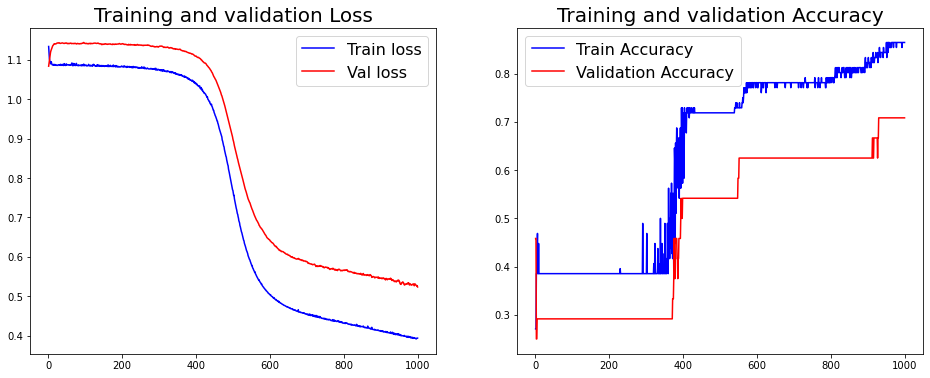

In [68]:
#Loss
loss_history = training.history['loss']
val_loss_hist = training.history['val_loss']

#Accuracy
train_acc_history = training.history['accuracy']
val_acc_hist = training.history['val_accuracy']
epochs = range(1, len(loss_history) + 1)

fig, axs = plt.subplots(1,2,figsize=(16,6))
axs[0].plot(epochs, loss_history, 'b', label='Train loss')
axs[0].plot(epochs, val_loss_hist, 'r', label='Val loss')
axs[0].set_title('Training and validation Loss',fontsize=20)
axs[0].legend(fontsize=16)
axs[1].plot(epochs, train_acc_history, 'b', label='Train Accuracy')
axs[1].plot(epochs, val_acc_hist, 'r', label='Validation Accuracy')
axs[1].set_title('Training and validation Accuracy',fontsize=20)
axs[1].legend(fontsize=16)
plt.show()

## Performance metrics

### Loss & Accuracy

In [69]:
model.evaluate(X_test_scal, y_test,verbose=2)

1/1 - 0s - loss: 0.5352 - accuracy: 0.6333 - 20ms/epoch - 20ms/step


[0.5351793766021729, 0.6333333253860474]

### Confusion Matrix

In [70]:
y_pred = np.argmax( model.predict(X_test_scal), axis=1) # Output class

1/1 [==============================] - 0s 86ms/step


In [71]:
y_pred

array([2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0], dtype=int64)

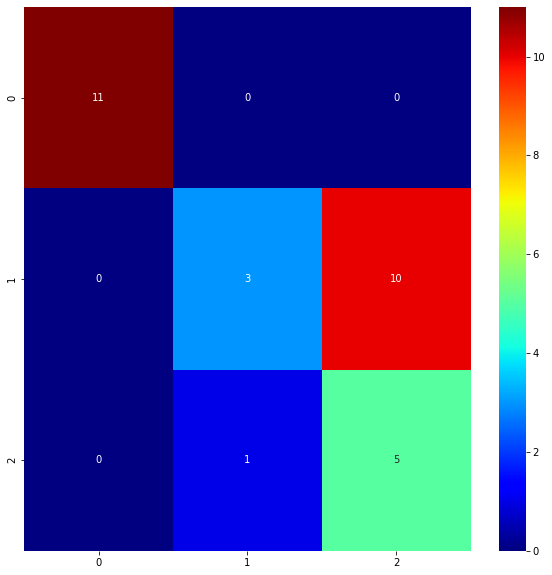

In [72]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = np.arange(0,3),columns = np.arange(0,3))
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True, cmap='jet',fmt='g')
plt.show()

# Comparacion

In [77]:
X_test_scal[:,0]

array([-0.09544771,  0.14071157, -0.44968663,  1.6757469 , -1.04008484,
        0.49495049, -1.04008484,  0.96726906,  1.0853487 ,  0.25879121,
        0.25879121,  0.61303014,  0.25879121,  0.73110978,  0.25879121,
       -1.15816448,  0.14071157, -0.44968663, -1.27624412, -0.56776627,
       -0.33160699, -0.33160699, -1.27624412, -1.74856268,  0.37687085,
       -1.5124034 , -0.9220052 ,  0.37687085, -1.04008484, -1.04008484])

In [76]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

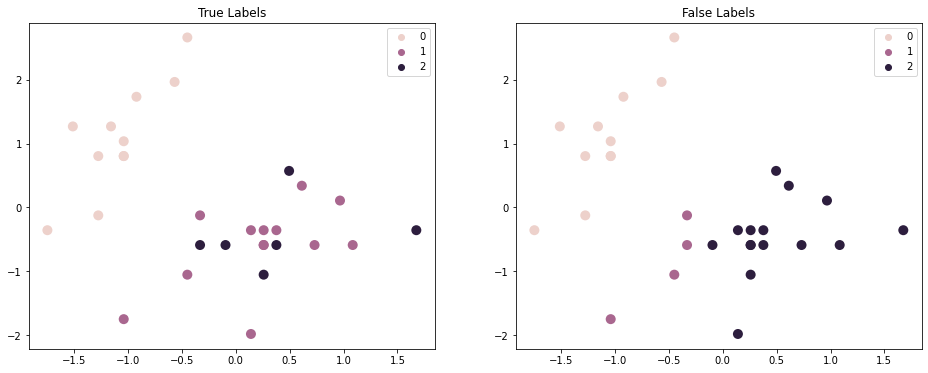

In [107]:
# Un scatter plot para visualizar dos variables
fig, axs = plt.subplots(1,2,figsize=(16,6))
# True
sns.scatterplot(x=X_test_scal[:,0], y=X_test_scal[:,1], hue = y_test, linewidth=0, alpha = 1,ax= axs[0],s=100)
axs[0].set_title('True Labels')
# Predict
sns.scatterplot(x=X_test_scal[:,0], y=X_test_scal[:,1], hue = y_pred, linewidth=0, alpha = 1,ax= axs[1],s=100)
axs[1].set_title('False Labels')
plt.show()